In [ ]:
import os                       # for working with files
import numpy as np              # for numerical computationss
import pandas as pd             # for working with dataframes
import matplotlib.pyplot as plt # for plotting informations on graph and images using tensors
import tensorflow as tf
#import tensorflow.keras.backend as K
from tensorflow.keras import models
from tensorflow.keras.models import Model
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Dropout, Flatten, Input, LeakyReLU
from tensorflow.keras.layers import BatchNormalization, Activation, Conv2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import MaxPooling2D
from keras.layers import MaxPool2D
import tensorflow.keras.metrics as metrics
from tensorflow.keras.callbacks import ModelCheckpoint
import random
import itertools

In [ ]:
import warnings
warnings.filterwarnings("ignore")
import tensorflow as tf
import matplotlib.pyplot as plt
tf.compat.v1.set_random_seed(0)
from tensorflow import keras
import itertools
from tensorflow.keras.layers.experimental.preprocessing import Rescaling
from sklearn.metrics import precision_score, accuracy_score, recall_score, confusion_matrix, ConfusionMatrixDisplay

In [ ]:
np.random.seed(0)
tf.random.set_seed(0)

In [ ]:
from google.colab import files #add .json file
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [ ]:
!rm -r ~/.kaggle
!mkdir ~/.kaggle
!cp ./kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

rm: cannot remove '/root/.kaggle': No such file or directory


In [ ]:
import zipfile
import os
from kaggle.cli import main
os.environ['KAGGLE_CONFIG_DIR'] = "/content"

In [ ]:
!kaggle datasets download -d harshart/balanced-plant-dataset

 99% 1.15G/1.17G [00:14<00:00, 94.4MB/s]
100% 1.17G/1.17G [00:14<00:00, 87.8MB/s]


In [ ]:
zip_ref = zipfile.ZipFile('balanced-plant-dataset.zip', 'r') #Opens the zip file in read mode
zip_ref.extractall('/tmp') #Extracts the files into the /tmp folder
zip_ref.close()

#Strawberry





In [ ]:
data_dir = r"/tmp/DS MINI PROJECT DATASET(BALANCEDANDIMBALANCED)"

train_dir = data_dir + "/Training/Strawberry"
valid_dir = data_dir + "/Testing/Strawberry"

In [ ]:
seed_train_validation = 1 # Must be same for train_ds and val_ds
shuffle_value = True
validation_split = 0.2

train_gen = tf.keras.utils.image_dataset_from_directory(
                                                        directory = train_dir,
                                                        image_size = (128, 128),
                                                        label_mode='categorical',
                                                        validation_split = validation_split,
                                                        batch_size=32,
                                                        subset = "training",
                                                        seed = seed_train_validation,
                                                        shuffle = shuffle_value)

val_gen = tf.keras.utils.image_dataset_from_directory(
                                                        directory = train_dir,
                                                        image_size = (128, 128),
                                                        validation_split = validation_split,
                                                        label_mode='categorical',
                                                        batch_size=32,
                                                        subset = "validation",
                                                        seed = seed_train_validation,
                                                        shuffle = shuffle_value)

test_it = tf.keras.utils.image_dataset_from_directory( directory= valid_dir,
                                                      batch_size=32,
                                                      image_size=(128, 128))

Found 3598 files belonging to 2 classes.
Using 2879 files for training.
Found 3598 files belonging to 2 classes.
Using 719 files for validation.
Found 900 files belonging to 2 classes.


In [ ]:
rescale = Rescaling(scale=1./255)
train_set  = train_gen.map(lambda image,label:(rescale(image),label))
valid_set  = val_gen.map(lambda image,label:(rescale(image),label))
test_set  = test_it.map(lambda image,label:(rescale(image),label))


In [ ]:
#with bN gave 99.0% lol doesnt make much of a difference than without 98.88

def define_sb_a():
  strawberry_avg = models.Sequential()
  strawberry_avg = Sequential()

  strawberry_avg.add(Conv2D(filters=16,kernel_size=(3,3),padding="same", activation="relu", input_shape=(128,128,3)))
  strawberry_avg.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
  #strawberry_avg.add(BatchNormalization())

  strawberry_avg.add(Conv2D(filters=32, kernel_size=(3,3), padding="same", activation="relu"))
  strawberry_avg.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
  #strawberry_avg.add(BatchNormalization())

  avg1 = tf.keras.layers.GlobalAveragePooling2D()(strawberry_avg.layers[-1].output)
  class1 = Dense(16, activation='relu', kernel_initializer='he_uniform')(avg1)
  output = Dense(2, activation='softmax')(class1)
  strawberry_avg = Model(inputs=strawberry_avg.inputs, outputs=output)
  return strawberry_avg

In [ ]:
strawberry_avg = define_sb_a()
strawberry_avg.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
strawberry_avg.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2_input (InputLayer  [(None, 128, 128, 3)]     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 128, 128, 16)      448       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 64, 64, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 64, 64, 32)        4640      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 32, 32, 32)        0         
 g2D)                                                            
                                                           

In [ ]:
%%time
epochsteps=len(train_set);epochs =20;valsteps=len(valid_set)
# fit model
history = strawberry_avg.fit(train_set, steps_per_epoch=epochsteps,
                    validation_data=valid_set, validation_steps=valsteps, epochs=epochs, verbose=1)

Epoch 1/20
90/90 [==============================] - 5s 33ms/step - loss: 0.5419 - accuracy: 0.7874 - val_loss: 0.3158 - val_accuracy: 0.9054
Epoch 2/20
90/90 [==============================] - 3s 31ms/step - loss: 0.2573 - accuracy: 0.9128 - val_loss: 0.1906 - val_accuracy: 0.9485
Epoch 3/20
90/90 [==============================] - 4s 43ms/step - loss: 0.2000 - accuracy: 0.9225 - val_loss: 0.1557 - val_accuracy: 0.9555
Epoch 4/20
90/90 [==============================] - 3s 36ms/step - loss: 0.1584 - accuracy: 0.9423 - val_loss: 0.1487 - val_accuracy: 0.9471
Epoch 5/20
90/90 [==============================] - 3s 30ms/step - loss: 0.1688 - accuracy: 0.9389 - val_loss: 0.1379 - val_accuracy: 0.9541
Epoch 6/20
90/90 [==============================] - 4s 44ms/step - loss: 0.1409 - accuracy: 0.9469 - val_loss: 0.1444 - val_accuracy: 0.9402
Epoch 7/20
90/90 [==============================] - 3s 32ms/step - loss: 0.1320 - accuracy: 0.9545 - val_loss: 0.1626 - val_accuracy: 0.9318
Epoch 8/20
90

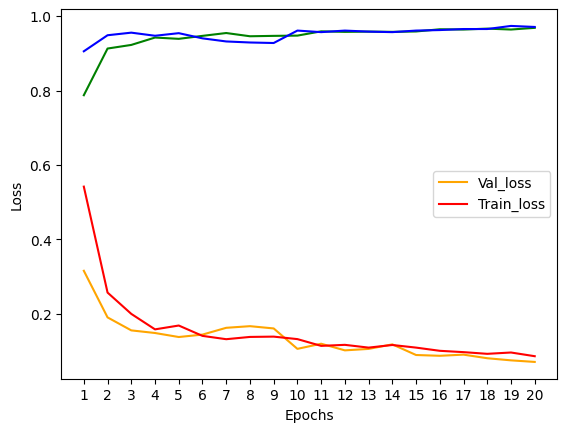

In [ ]:
plt.plot(history.history['val_loss'], color = 'orange')
plt.plot(history.history['loss'], color='red')
plt.plot(history.history['accuracy'], color = 'green')
plt.plot(history.history['val_accuracy'], color = 'blue')
plt.legend(['Val_loss','Train_loss'])
e=range(0,20)
labels=range(1,21)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.xticks(e,labels)
plt.show()

In [ ]:
labels = []
predictions = []
for x,y in test_set:
    labels.append(list(y.numpy()))
    predictions.append(tf.argmax(strawberry_avg.predict(x),1).numpy())

1/1 [==============================] - 0s 61ms/step


In [ ]:
predictions = list(itertools.chain.from_iterable(predictions))
labels = list(itertools.chain.from_iterable(labels))

In [ ]:
print("Train Accuracy  : {:.2f} %".format(history.history['accuracy'][-1]*100))
print("Test Accuracy   : {:.2f} %".format(accuracy_score(labels, predictions) * 100))
print("Precision Score : {:.2f} %".format(precision_score(labels, predictions, average='micro') * 100))
print("Recall Score    : {:.2f} %".format(recall_score(labels, predictions, average='micro') * 100))

Train Accuracy  : 96.84 %
Test Accuracy   : 96.78 %
Precision Score : 96.78 %
Recall Score    : 96.78 %


ValueError: ignored

<Figure size 200x200 with 0 Axes>

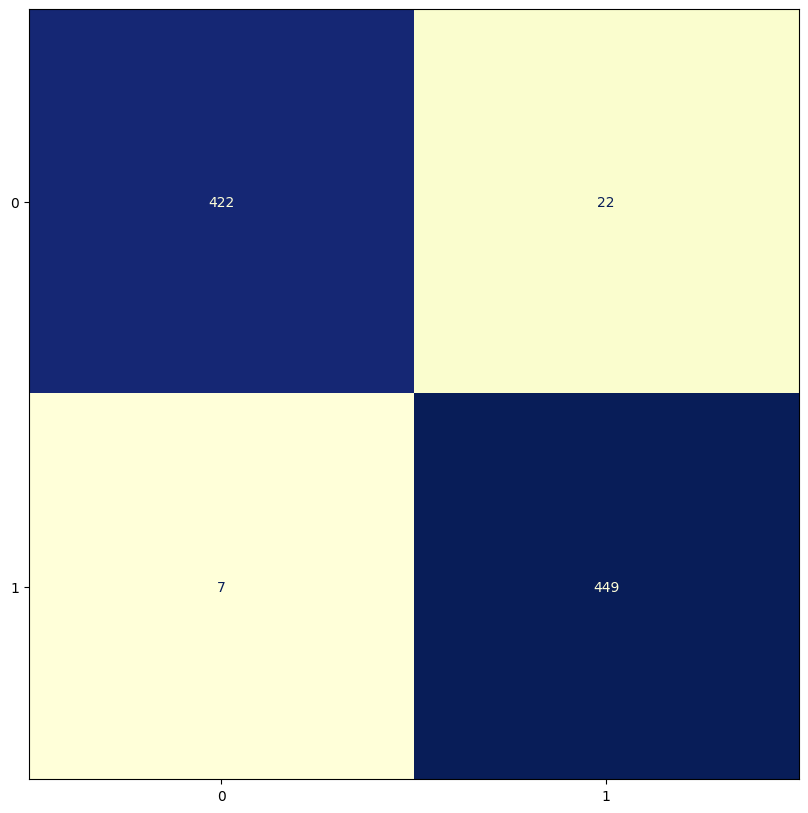

In [ ]:
# Plot a confusion matrix based on the true labels and predicted labels
plt.figure(figsize= (2,2))
cm = confusion_matrix(labels, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(range(1,2)))
fig, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax,colorbar= False,cmap = 'YlGnBu')
plt.title("Confusion Matrix")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
strawberry_avg.save("strawberryAvg-20-Final.h5")

#Bell Pepper

In [ ]:
data_dir = r"/tmp/DS MINI PROJECT DATASET(BALANCEDANDIMBALANCED)"
train_bp_dir = data_dir + "/Training/Bell Pepper"
test_bp_dir = data_dir + "/Testing/Bell Pepper"

In [ ]:
seed_train_validation = 1 # Must be same for train_ds and val_ds
shuffle_value = True
validation_split = 0.2

train_gen = tf.keras.utils.image_dataset_from_directory(
                                                        directory = train_bp_dir,
                                                        image_size = (128, 128),
                                                        label_mode='categorical',
                                                        validation_split = validation_split,
                                                        batch_size=32,
                                                        subset = "training",
                                                        seed = seed_train_validation,
                                                        shuffle = shuffle_value)

val_gen = tf.keras.utils.image_dataset_from_directory(
                                                        directory = train_bp_dir,
                                                        image_size = (128, 128),
                                                        validation_split = validation_split,
                                                        label_mode='categorical',
                                                        batch_size=32,
                                                        subset = "validation",
                                                        seed = seed_train_validation,
                                                        shuffle = shuffle_value)

test_it = tf.keras.utils.image_dataset_from_directory( directory= test_bp_dir,
                                                      batch_size=32,
                                                      image_size=(128, 128))

Found 3901 files belonging to 2 classes.
Using 3121 files for training.
Found 3901 files belonging to 2 classes.
Using 780 files for validation.
Found 975 files belonging to 2 classes.


In [ ]:
rescale = Rescaling(scale=1./255)
train_set  = train_gen.map(lambda image,label:(rescale(image),label))
valid_set  = val_gen.map(lambda image,label:(rescale(image),label))
test_set  = test_it.map(lambda image,label:(rescale(image),label))

In [ ]:
#average pooling
from keras.layers import GlobalAveragePooling2D

bell_pepper_a = models.Sequential()
bell_pepper_a = Sequential()

bell_pepper_a.add(Conv2D(filters=16,kernel_size=(3,3),padding="same", activation="relu", input_shape=(128,128,3)))
bell_pepper_a.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
#bell_pepper_a.add(Dropout(0.4))

bell_pepper_a.add(Conv2D(filters=32, kernel_size=(3,3), padding="same", activation="relu"))
bell_pepper_a.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
#model1.add(Dropout(0.6))

avg1 = GlobalAveragePooling2D()(bell_pepper_a.layers[-1].output)

class1 = Dense(16, activation='relu', kernel_initializer='he_uniform')(avg1)
output = Dense(2, activation='softmax')(class1)
bell_pepper_a = Model(inputs=bell_pepper_a.inputs, outputs=output)

In [ ]:
bell_pepper_a.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
bell_pepper_a.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9_input (InputLayer  [(None, 128, 128, 3)]     0         
 )                                                               
                                                                 
 conv2d_9 (Conv2D)           (None, 128, 128, 16)      448       
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 64, 64, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 64, 64, 32)        4640      
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 32, 32, 32)        0         
 ng2D)                                                           
                                                           

In [ ]:
epochsteps=len(train_set);e=20;valsteps=len(valid_set) #teststeps=len(test_it)

history = bell_pepper_a.fit(train_set, steps_per_epoch=epochsteps,
                    validation_data=valid_set, validation_steps=valsteps, epochs=e, verbose=1)
# test_loss, test_acc = bell_pepper_a.evaluate(test_it, steps=teststeps, verbose=1)
# print('Test Accuracy=',str(test_acc * 100.0)+'%')
# print('Test Loss=',str(test_loss*100)+'%')

Epoch 1/20
98/98 [==============================] - 6s 32ms/step - loss: 0.6225 - accuracy: 0.6597 - val_loss: 0.5060 - val_accuracy: 0.8308
Epoch 2/20
98/98 [==============================] - 3s 32ms/step - loss: 0.4424 - accuracy: 0.8013 - val_loss: 0.4075 - val_accuracy: 0.7872
Epoch 3/20
98/98 [==============================] - 4s 41ms/step - loss: 0.3465 - accuracy: 0.8565 - val_loss: 0.3094 - val_accuracy: 0.8872
Epoch 4/20
98/98 [==============================] - 3s 31ms/step - loss: 0.2965 - accuracy: 0.8686 - val_loss: 0.2754 - val_accuracy: 0.8949
Epoch 5/20
98/98 [==============================] - 3s 32ms/step - loss: 0.2744 - accuracy: 0.8837 - val_loss: 0.2544 - val_accuracy: 0.9090
Epoch 6/20
98/98 [==============================] - 4s 34ms/step - loss: 0.2526 - accuracy: 0.8927 - val_loss: 0.2376 - val_accuracy: 0.9064
Epoch 7/20
98/98 [==============================] - 3s 30ms/step - loss: 0.2449 - accuracy: 0.8930 - val_loss: 0.2689 - val_accuracy: 0.8833
Epoch 8/20
98

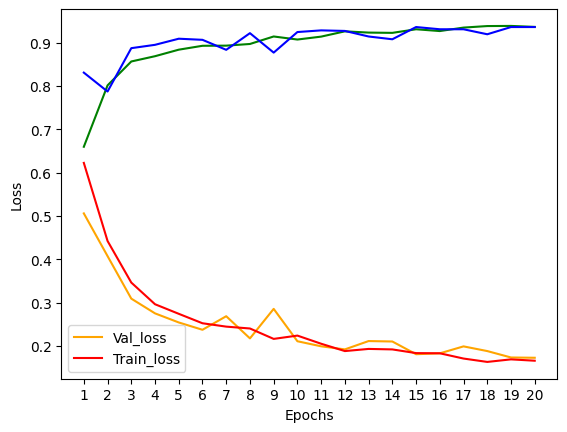

In [ ]:
plt.plot(history.history['val_loss'], color = 'orange')
plt.plot(history.history['loss'], color='red')
plt.plot(history.history['accuracy'], color = 'green')
plt.plot(history.history['val_accuracy'], color = 'blue')
plt.legend(['Val_loss','Train_loss'])
e=range(0,20)
labels=range(1,21)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.xticks(e,labels)
plt.show()

In [ ]:
labels = []
predictions = []
for x,y in test_set:
    labels.append(list(y.numpy()))
    predictions.append(tf.argmax(bell_pepper_a.predict(x),1).numpy())

1/1 [==============================] - 0s 84ms/step


In [ ]:
predictions = list(itertools.chain.from_iterable(predictions))
labels = list(itertools.chain.from_iterable(labels))

In [ ]:
print("Train Accuracy  : {:.2f} %".format(history.history['accuracy'][-1]*100))
print("Test Accuracy   : {:.2f} %".format(accuracy_score(labels, predictions) * 100))
print("Precision Score : {:.2f} %".format(precision_score(labels, predictions, average='micro') * 100))
print("Recall Score    : {:.2f} %".format(recall_score(labels, predictions, average='micro') * 100))

Train Accuracy  : 93.62 %
Test Accuracy   : 95.38 %
Precision Score : 95.38 %
Recall Score    : 95.38 %


ValueError: ignored

<Figure size 200x200 with 0 Axes>

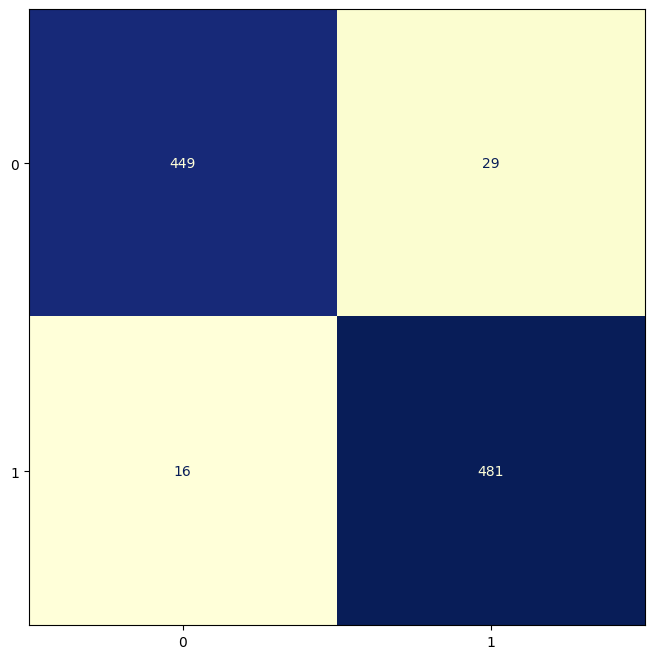

In [ ]:
# Plot a confusion matrix based on the true labels and predicted labels
plt.figure(figsize= (2,2))
cm = confusion_matrix(labels, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(range(1,2)))
fig, ax = plt.subplots(figsize=(8,8))
disp.plot(ax=ax,colorbar= False,cmap = 'YlGnBu')
plt.title("Confusion Matrix")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
bell_pepper_a.save("BP_Avg-20-Final_95.4.h5")

#Cherry

In [ ]:
data_dir = r"/tmp/DS MINI PROJECT DATASET(BALANCEDANDIMBALANCED)"
train_cherry_dir = data_dir + "/Training/Cherry"
valid_cherry_dir = data_dir + "/Testing/Cherry"

In [ ]:
seed_train_validation = 1 # Must be same for train_ds and val_ds
shuffle_value = True
validation_split = 0.2

train_gen = tf.keras.utils.image_dataset_from_directory(
                                                        directory = train_cherry_dir,
                                                        image_size = (128, 128),
                                                        label_mode='categorical',
                                                        validation_split = validation_split,
                                                        batch_size=32,
                                                        subset = "training",
                                                        seed = seed_train_validation,
                                                        shuffle = shuffle_value)

val_gen = tf.keras.utils.image_dataset_from_directory(
                                                        directory = train_cherry_dir,
                                                        image_size = (128, 128),
                                                        validation_split = validation_split,
                                                        label_mode='categorical',
                                                        batch_size=32,
                                                        subset = "validation",
                                                        seed = seed_train_validation,
                                                        shuffle = shuffle_value)

test_it = tf.keras.utils.image_dataset_from_directory( directory= valid_cherry_dir,
                                                      batch_size=32,
                                                      image_size=(128, 128))

Found 3509 files belonging to 2 classes.
Using 2808 files for training.
Found 3509 files belonging to 2 classes.
Using 701 files for validation.
Found 877 files belonging to 2 classes.


In [ ]:
rescale = Rescaling(scale=1./255)
train_set  = train_gen.map(lambda image,label:(rescale(image),label))
valid_set  = val_gen.map(lambda image,label:(rescale(image),label))
test_set  = test_it.map(lambda image,label:(rescale(image),label))

In [ ]:
#CNN Model with averagepool
#model 1
from keras.layers import GlobalAveragePooling2D
cherry_avg = models.Sequential()
cherry_avg = Sequential()

cherry_avg.add(Conv2D(filters=16,kernel_size=(3,3),padding="same", activation="relu", input_shape=(128,128,3)))
cherry_avg.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
#cherry_avg.add(Dropout(0.4))

cherry_avg.add(Conv2D(filters=32, kernel_size=(3,3), padding="same", activation="relu"))
cherry_avg.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
#model1.add(Dropout(0.6))

avg1 = GlobalAveragePooling2D()(cherry_avg.layers[-1].output)

class1 = Dense(16, activation='relu', kernel_initializer='he_uniform')(avg1)
output = Dense(2, activation='softmax')(class1)
cherry_avg = Model(inputs=cherry_avg.inputs, outputs=output)

In [ ]:
cherry_avg.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
cherry_avg.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_input (InputLayer)   [(None, 128, 128, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 128, 128, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 64, 64, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 32, 32, 32)        0         
 g2D)                                                            
                                                                 
 global_average_pooling2d (  (None, 32)                0     

In [ ]:
#20 epoch
%%time
epochsteps=len(train_set);epochs =20;valsteps=len(valid_set)#teststeps=len(test_it)
# fit model
history = cherry_avg.fit(train_set, steps_per_epoch=epochsteps,
                    validation_data=valid_set, validation_steps=valsteps, epochs=epochs, verbose=1)
# test_loss, test_acc = cherry_avg.evaluate(test_it, steps=teststeps, verbose=1)
# print('Test accuracy=',str(test_acc * 100.0)+'%')
# print('Test loss=',str(test_loss * 100.0)+'%')

Epoch 1/20
88/88 [==============================] - 15s 34ms/step - loss: 0.6782 - accuracy: 0.5267 - val_loss: 0.6653 - val_accuracy: 0.5007
Epoch 2/20
88/88 [==============================] - 3s 28ms/step - loss: 0.5892 - accuracy: 0.7176 - val_loss: 0.4464 - val_accuracy: 0.9529
Epoch 3/20
88/88 [==============================] - 3s 32ms/step - loss: 0.3246 - accuracy: 0.9156 - val_loss: 0.1925 - val_accuracy: 0.9757
Epoch 4/20
88/88 [==============================] - 3s 30ms/step - loss: 0.1203 - accuracy: 0.9854 - val_loss: 0.0882 - val_accuracy: 0.9886
Epoch 5/20
88/88 [==============================] - 3s 32ms/step - loss: 0.0748 - accuracy: 0.9865 - val_loss: 0.0485 - val_accuracy: 0.9943
Epoch 6/20
88/88 [==============================] - 4s 41ms/step - loss: 0.0741 - accuracy: 0.9847 - val_loss: 0.0686 - val_accuracy: 0.9872
Epoch 7/20
88/88 [==============================] - 3s 29ms/step - loss: 0.0523 - accuracy: 0.9890 - val_loss: 0.0433 - val_accuracy: 0.9900
Epoch 8/20
8

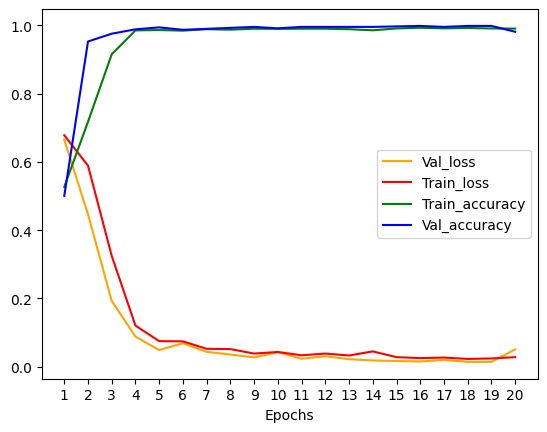

In [ ]:
#20 epoch
plt.plot(history.history['val_loss'], color = 'orange')
plt.plot(history.history['loss'], color='red')
plt.plot(history.history['accuracy'], color = 'green')
plt.plot(history.history['val_accuracy'], color = 'blue')
plt.legend(['Val_loss','Train_loss',"Train_accuracy",'Val_accuracy'])
e=range(0,20)
labels=range(1,21)
plt.xlabel("Epochs")
plt.xticks(e,labels)
plt.show()

In [ ]:
labels = []
predictions = []
for x,y in test_set:
    labels.append(list(y.numpy()))
    predictions.append(tf.argmax(cherry_avg.predict(x),1).numpy())

1/1 [==============================] - 0s 155ms/step


In [ ]:
predictions = list(itertools.chain.from_iterable(predictions))
labels = list(itertools.chain.from_iterable(labels))

In [ ]:
print("Train Accuracy  : {:.2f} %".format(history.history['accuracy'][-1]*100))
print("Test Accuracy   : {:.2f} %".format(accuracy_score(labels, predictions) * 100))
print("Precision Score : {:.2f} %".format(precision_score(labels, predictions, average='micro') * 100))
print("Recall Score    : {:.2f} %".format(recall_score(labels, predictions, average='micro') * 100))

Train Accuracy  : 99.07 %
Test Accuracy   : 98.18 %
Precision Score : 98.18 %
Recall Score    : 98.18 %


<Figure size 200x200 with 0 Axes>

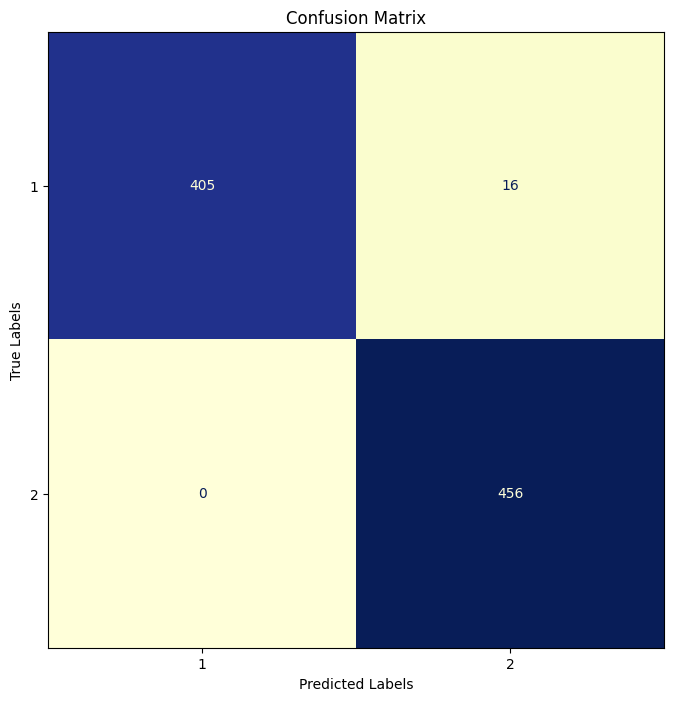

In [ ]:
# Plot a confusion matrix based on the true labels and predicted labels
plt.figure(figsize= (2,2))
cm = confusion_matrix(labels, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(range(1,3)))
fig, ax = plt.subplots(figsize=(8,8))
disp.plot(ax=ax,colorbar= False,cmap = 'YlGnBu')
plt.title("Confusion Matrix")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
cherry_avg.save("Cherry_Avg-20-Final_99.54.h5")

#Peach

In [ ]:
data_dir = r"/tmp/DS MINI PROJECT DATASET(BALANCEDANDIMBALANCED)"
train_peach_dir = data_dir + "/Training/Peach"
valid_peach_dir = data_dir + "/Testing/Peach"

In [ ]:
seed_train_validation = 1 # Must be same for train_ds and val_ds
shuffle_value = True
validation_split = 0.2

train_gen = tf.keras.utils.image_dataset_from_directory(
                                                        directory = train_peach_dir,
                                                        image_size = (128, 128),
                                                        label_mode='categorical',
                                                        validation_split = validation_split,
                                                        batch_size=32,
                                                        subset = "training",
                                                        seed = seed_train_validation,
                                                        shuffle = shuffle_value)

val_gen = tf.keras.utils.image_dataset_from_directory(
                                                        directory = train_peach_dir,
                                                        image_size = (128, 128),
                                                        validation_split = validation_split,
                                                        label_mode='categorical',
                                                        batch_size=32,
                                                        subset = "validation",
                                                        seed = seed_train_validation,
                                                        shuffle = shuffle_value)

test_it = tf.keras.utils.image_dataset_from_directory( directory= valid_peach_dir,
                                                      batch_size=32,
                                                      image_size=(128, 128))

Found 3566 files belonging to 2 classes.
Using 2853 files for training.
Found 3566 files belonging to 2 classes.
Using 713 files for validation.
Found 891 files belonging to 2 classes.


In [ ]:
rescale = Rescaling(scale=1./255)
train_set  = train_gen.map(lambda image,label:(rescale(image),label))
valid_set  = val_gen.map(lambda image,label:(rescale(image),label))
test_set  = test_it.map(lambda image,label:(rescale(image),label))

In [ ]:
#average pooling
#accuracy = 99.32
from keras.layers import GlobalAveragePooling2D

def define_p_a():
  peach_a = models.Sequential()
  peach_a = Sequential()

  peach_a.add(Conv2D(filters=16,kernel_size=(3,3),padding="same", activation="relu", input_shape=(128,128,3)))
  peach_a.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
  # peach_a.add(Dropout(0.4))

  peach_a.add(Conv2D(filters=32, kernel_size=(3,3), padding="same", activation="relu"))
  peach_a.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))


  avg1 = GlobalAveragePooling2D()(peach_a.layers[-1].output)
  class1 = Dense(16, activation='relu', kernel_initializer='he_uniform')(avg1)
  output = Dense(2, activation='softmax')(class1)
  peach_a = Model(inputs=peach_a.inputs, outputs=output)
  return peach_a

In [ ]:
peach_a = define_p_a()
peach_a.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
peach_a.summary()

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_17_input (InputLaye  [(None, 128, 128, 3)]     0         
 r)                                                              
                                                                 
 conv2d_17 (Conv2D)          (None, 128, 128, 16)      448       
                                                                 
 max_pooling2d_17 (MaxPooli  (None, 64, 64, 16)        0         
 ng2D)                                                           
                                                                 
 conv2d_18 (Conv2D)          (None, 64, 64, 32)        4640      
                                                                 
 max_pooling2d_18 (MaxPooli  (None, 32, 32, 32)        0         
 ng2D)                                                           
                                                           

In [ ]:
%%time
epochsteps=len(train_set);epochs=20;valsteps=len(valid_set)
# fit model
history = peach_a.fit(train_set, steps_per_epoch=epochsteps,
                    validation_data=valid_set, validation_steps=valsteps, epochs=epochs, verbose=1)

Epoch 1/20
90/90 [==============================] - 6s 36ms/step - loss: 0.6271 - accuracy: 0.6695 - val_loss: 0.5221 - val_accuracy: 0.8359
Epoch 2/20
90/90 [==============================] - 3s 33ms/step - loss: 0.3772 - accuracy: 0.8945 - val_loss: 0.2438 - val_accuracy: 0.9383
Epoch 3/20
90/90 [==============================] - 3s 31ms/step - loss: 0.1895 - accuracy: 0.9478 - val_loss: 0.1957 - val_accuracy: 0.9116
Epoch 4/20
90/90 [==============================] - 4s 42ms/step - loss: 0.1242 - accuracy: 0.9657 - val_loss: 0.1095 - val_accuracy: 0.9705
Epoch 5/20
90/90 [==============================] - 3s 34ms/step - loss: 0.0936 - accuracy: 0.9709 - val_loss: 0.1414 - val_accuracy: 0.9355
Epoch 6/20
90/90 [==============================] - 3s 30ms/step - loss: 0.0809 - accuracy: 0.9744 - val_loss: 0.0797 - val_accuracy: 0.9762
Epoch 7/20
90/90 [==============================] - 4s 41ms/step - loss: 0.0813 - accuracy: 0.9720 - val_loss: 0.1141 - val_accuracy: 0.9481
Epoch 8/20
90

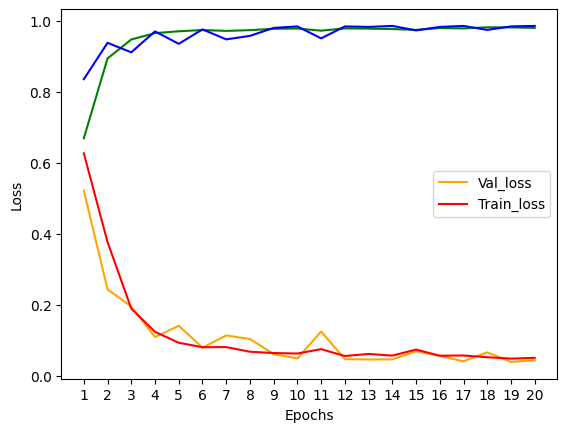

In [ ]:
plt.plot(history.history['val_loss'], color = 'orange')
plt.plot(history.history['loss'], color='red')
plt.plot(history.history['accuracy'], color = 'green')
plt.plot(history.history['val_accuracy'], color = 'blue')
plt.legend(['Val_loss','Train_loss'])
e=range(0,20)
labels=range(1,21)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.xticks(e,labels)
plt.show()

In [ ]:
labels = []
predictions = []
for x,y in test_set:
    labels.append(list(y.numpy()))
    predictions.append(tf.argmax(peach_a.predict(x),1).numpy())

1/1 [==============================] - 0s 71ms/step


In [ ]:
predictions = list(itertools.chain.from_iterable(predictions))
labels = list(itertools.chain.from_iterable(labels))

In [ ]:
print("Train Accuracy  : {:.2f} %".format(history.history['accuracy'][-1]*100))
print("Test Accuracy   : {:.2f} %".format(accuracy_score(labels, predictions) * 100))
print("Precision Score : {:.2f} %".format(precision_score(labels, predictions, average='micro') * 100))
print("Recall Score    : {:.2f} %".format(recall_score(labels, predictions, average='micro') * 100))

Train Accuracy  : 98.04 %
Test Accuracy   : 98.88 %
Precision Score : 98.88 %
Recall Score    : 98.88 %


ValueError: ignored

<Figure size 200x200 with 0 Axes>

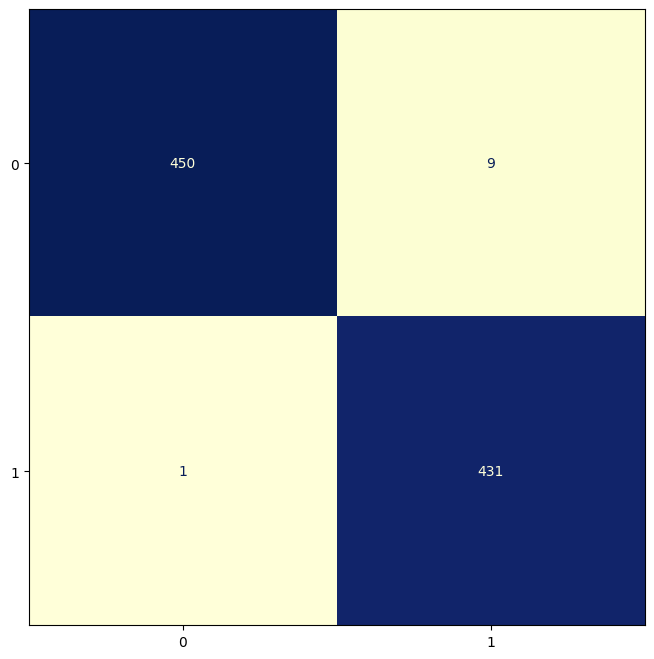

In [ ]:
# Plot a confusion matrix based on the true labels and predicted labels
plt.figure(figsize= (2,2))
cm = confusion_matrix(labels, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(range(1,2)))
fig, ax = plt.subplots(figsize=(8,8))
disp.plot(ax=ax,colorbar= False,cmap = 'YlGnBu')
plt.title("Confusion Matrix")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
peach_a.save("Peach_Avg-20-Final_98.88.h5")